In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/Users/guzhengan/Desktop/pandas学习/joyful-pandas/data/table_missing.csv')
df.head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,NaN,M,street_1,173,NaN,34.0,A+
1,S_1,C_1,NaN,F,street_2,192,NaN,32.5,B+
2,S_1,C_1,1103.0,M,street_2,186,NaN,87.2,B+
3,S_1,NaN,NaN,F,street_2,167,81.0,80.4,NaN
4,S_1,C_1,1105.0,NaN,street_4,159,64.0,84.8,A-


# 第六章 缺失数据

### 2. groupby方法中的缺失值
#### 自动忽略为缺失值的组

In [2]:
df_g = pd.DataFrame({'one':['A','B','C','D',np.nan],'two':np.random.randn(5)})
df_g

,one,two
0,A,0.134063
1,B,0.602523
2,C,-1.600386
3,D,-0.755194
4,NaN,-0.243922


In [3]:
df_g.groupby('one').groups

{'A': Int64Index([0], dtype='int64'),
 'B': Int64Index([1], dtype='int64'),
 'C': Int64Index([2], dtype='int64'),
 'D': Int64Index([3], dtype='int64')}

## 三、填充与剔除

### 1.fillna 方法
#### （a）值填充与前后向填充（分别与ffill和bfill方法等价）

In [5]:
df['Physics'].fillna('missing').head()

0         A+
1         B+
2         B+
3    missing
4         A-
Name: Physics, dtype: object

In [6]:
df['Physics'].fillna(method = 'ffill').head()

0    A+
1    B+
2    B+
3    B+
4    A-
Name: Physics, dtype: object

In [7]:
df['Physics'].fillna(method = 'bfill').head()

0    A+
1    B+
2    B+
3    A-
4    A-
Name: Physics, dtype: object

#### (b)填充中的对齐特性

In [8]:
df_f = pd.DataFrame({'A':[1,3,np.nan],'B':[2,4,np.nan],'C':[3,5,np.nan]})
df_f.fillna(df_f.mean())

,A,B,C
0,1.0,2.0,3.0
1,3.0,4.0,5.0
2,2.0,3.0,4.0


#### 返回的结果中没有C，根据对齐特性不会被填充

In [9]:
df_f.fillna(df_f.mean()[['A','B']])

,A,B,C
0,1.0,2.0,3.0
1,3.0,4.0,5.0
2,2.0,3.0,NaN


### 2.dropna方法
#### （a）axis参数

In [10]:
df_d = pd.DataFrame({'A':[np.nan,np.nan,np.nan],'B':[np.nan,3,2],'C':[3,2,1]})
df_d

,A,B,C
0,NaN,NaN,3
1,NaN,3.0,2
2,NaN,2.0,1


In [11]:
df_d.dropna(axis = 0) # 行索引方向

,A,B,C


In [12]:
df_d.dropna(axis = 1) # 列索引方向

,C
0,3
1,2
2,1


#### （b）how参数（可以选all或者any，表示全为缺失去除和存在缺失去除）

In [13]:
df_d.dropna(axis = 1,how = 'all') #列方向，how =‘all’ 全部为缺失值则drop

,B,C
0,NaN,3
1,3.0,2
2,2.0,1


#### （c）subset参数（即在某一组列范围中搜索缺失值）

In [16]:
df_d.dropna(axis = 0,subset = ['B','C'])

,A,B,C
1,NaN,3.0,2
2,NaN,2.0,1


## 四、插值（interpolation）
### 1.线性插值
#### （a）索引无关的线性插值
#### 默认状态下，interpolation会对缺失的值进行线性插值

In [17]:
s = pd.Series([1,10,15,-5,-2,np.nan,np.nan,28])
s

0     1.0
1    10.0
2    15.0
3    -5.0
4    -2.0
5     NaN
6     NaN
7    28.0
dtype: float64

In [19]:
s.interpolate()

0     1.0
1    10.0
2    15.0
3    -5.0
4    -2.0
5     8.0
6    18.0
7    28.0
dtype: float64

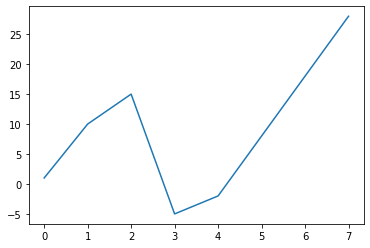

In [20]:
s.interpolate().plot()

#### 此时的插值与索引无关

In [21]:
s.index = np.sort(np.random.randint(50,300,8))
s.interpolate()

101     1.0
153    10.0
181    15.0
182    -5.0
199    -2.0
268     8.0
274    18.0
285    28.0
dtype: float64

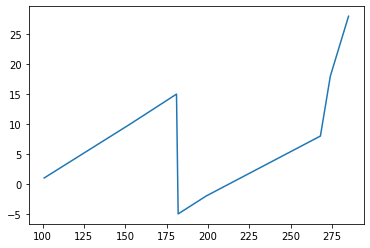

In [22]:
s.interpolate().plot()

#### 与索引有关的插值
#### method中的index和time选项可以使用插值线性地依赖索引，即插值为索引的线性函数

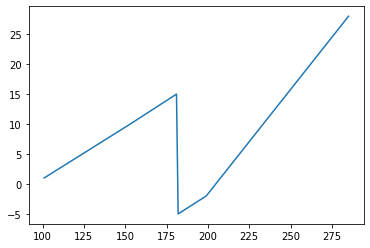

In [23]:
s.interpolate(method='index').plot()

#### 如果索引是时间，那么可以按照时间长短插值

In [24]:
s_t = pd.Series([0,np.nan,10]
        ,index=[pd.Timestamp('2012-05-01'),pd.Timestamp('2012-05-07'),pd.Timestamp('2012-06-03')])
s_t

2012-05-01     0.0
2012-05-07     NaN
2012-06-03    10.0
dtype: float64

In [26]:
s_t.interpolate()

2012-05-01     0.0
2012-05-07     5.0
2012-06-03    10.0
dtype: float64

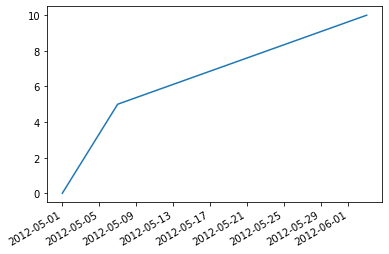

In [27]:
s_t.interpolate().plot()

In [28]:
s_t.interpolate(method='time')

2012-05-01     0.000000
2012-05-07     1.818182
2012-06-03    10.000000
dtype: float64

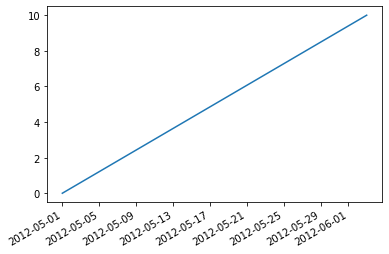

In [29]:
s_t.interpolate(method='time').plot()

### 2.高级插值方法
#### 此处的高级插值指的是与线性插值相比较，例如样条插值、多项式插值等

In [30]:
ser = pd.Series(np.arange(1, 10.1, .25) ** 2 + np.random.randn(37))
missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])
ser[missing] = np.nan
methods = ['linear', 'quadratic', 'cubic']
df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})
df

,linear,quadratic,cubic
0,-0.000425,-0.000425,-0.000425
1,2.667772,2.667772,2.667772
2,3.883589,3.883589,3.883589
3,2.694668,2.694668,2.694668
4,4.271470,4.042568,4.015074
5,5.848272,5.848272,5.848272
6,5.728164,5.728164,5.728164
7,7.007545,7.007545,7.007545
8,9.178552,9.178552,9.178552
9,9.625312,9.625312,9.625312


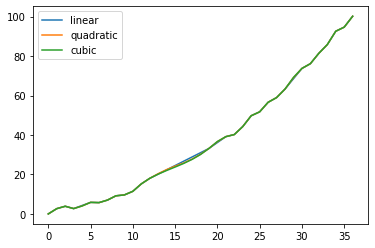

In [31]:
df.plot()

### 3.interpolate的限制参数
#### （a）limit表示最多插入多少个

In [32]:
s = pd.Series([1,np.nan,np.nan,np.nan,5])
s

0    1.0
1    NaN
2    NaN
3    NaN
4    5.0
dtype: float64

In [33]:
s.interpolate(limit=2)

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

#### （b）limit_direction表示插值方向，可选forward,backward,both,默认前向

In [39]:
s = pd.Series([np.nan,np.nan,1,np.nan,np.nan,np.nan,5,np.nan,np.nan])
s

0    NaN
1    NaN
2    1.0
3    NaN
4    NaN
5    NaN
6    5.0
7    NaN
8    NaN
dtype: float64

In [40]:
s.interpolate(limit_direction='backward')

0    1.0
1    1.0
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    NaN
8    NaN
dtype: float64

In [41]:
s.interpolate(limit_direction='forward')

0    NaN
1    NaN
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    5.0
8    5.0
dtype: float64

#### (c) limit_area表示插值区域，可选inside、outside，默认None

In [37]:
s = pd.Series([np.nan,np.nan,1,np.nan,np.nan,np.nan,5,np.nan,np.nan,])
s.interpolate(limit_area = 'inside')

0    NaN
1    NaN
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    NaN
8    NaN
dtype: float64

In [38]:
s = pd.Series([np.nan,np.nan,1,np.nan,np.nan,np.nan,5,np.nan,np.nan,])
s.interpolate(limit_area = 'outside')

0    NaN
1    NaN
2    1.0
3    NaN
4    NaN
5    NaN
6    5.0
7    5.0
8    5.0
dtype: float64

## 五、问题与练习

## 1.问题

#### 【问题一】 如何删除缺失值占比超过25%的列？

In [46]:
df = pd.read_csv('/Users/guzhengan/Desktop/pandas学习/joyful-pandas/data/table_missing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   School   35 non-null     object 
 1   Class    31 non-null     object 
 2   ID       29 non-null     float64
 3   Gender   28 non-null     object 
 4   Address  35 non-null     object 
 5   Height   35 non-null     int64  
 6   Weight   22 non-null     float64
 7   Math     30 non-null     float64
 8   Physics  31 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 2.6+ KB


##### 共35行9列，其中缺失值占比超过25%的，即non—null要小于 35*0.75 = 27，这里为 df['Weight']
##### 尝试：float（df['Weight'].count())/len(df)  < 0.25,则 df.drop(Weight',axis = 1,inplace = True )

##### 【问题二】 什么是Nullable类型？请谈谈为什么要引入这个设计？

##### 考虑pandas中多种缺失值的情况，统一缺失值的处理方法

### 2.练习

#### 【练习一】现有一份虚拟数据集，列类型分别为string/浮点/整型，请解决如下问题：
#### （a）请以列类型读入数据，并选出C为缺失值的行。
#### （b） 现需要将A中的部分单元转为缺失值，单元格中的最小转换概率为25%，且概率大小与所在行B列单元的值成正比。